<a href="https://colab.research.google.com/github/jclee0109/deep_learning_self_study/blob/main/2_2_%EB%8D%B0%EC%9D%B4%ED%84%B0_%EC%A0%84%EC%B2%98%EB%A6%AC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
fish_length = [25.4, 26.3, 26.5, 29.0, 29.0, 29.7, 29.7, 30.0, 30.0, 30.7, 31.0, 31.0, 
                31.5, 32.0, 32.0, 32.0, 33.0, 33.0, 33.5, 33.5, 34.0, 34.0, 34.5, 35.0, 
                35.0, 35.0, 35.0, 36.0, 36.0, 37.0, 38.5, 38.5, 39.5, 41.0, 41.0, 9.8, 
                10.5, 10.6, 11.0, 11.2, 11.3, 11.8, 11.8, 12.0, 12.2, 12.4, 13.0, 14.3, 15.0]
fish_weight = [242.0, 290.0, 340.0, 363.0, 430.0, 450.0, 500.0, 390.0, 450.0, 500.0, 475.0, 500.0, 
                500.0, 340.0, 600.0, 600.0, 700.0, 700.0, 610.0, 650.0, 575.0, 685.0, 620.0, 680.0, 
                700.0, 725.0, 720.0, 714.0, 850.0, 1000.0, 920.0, 955.0, 925.0, 975.0, 950.0, 6.7, 
                7.5, 7.0, 9.7, 9.8, 8.7, 10.0, 9.9, 9.8, 12.2, 13.4, 12.2, 19.7, 19.9]

In [5]:
import numpy as np

fish_data = np.column_stack((fish_length, fish_weight))
fish_target = np.concatenate((np.ones(35), np.zeros(14)))

In [11]:
from sklearn.model_selection import train_test_split
train_input, test_input, train_target, test_target = train_test_split(fish_data, fish_target, random_state=242)

print(train_input.shape, test_input.shape)
print(train_target.shape, test_target.shape)

(36, 2) (13, 2)
(36,) (13,)


In [12]:
print(test_target)
print(np.mean(test_target))
print(np.mean(fish_target))
# test_target과 전체 fish_target의 분포가 달라서 train을 할 때 한쪽으로 치우칠 수 있음!
# 분포를 전체분포와 학습, test분포를 맞춰줘야함

[1. 1. 0. 1. 0. 0. 1. 0. 1. 1. 1. 1. 0.]
0.6153846153846154
0.7142857142857143


In [13]:
train_input, test_input, train_target, test_target = train_test_split(fish_data, fish_target, random_state=23, stratify=fish_target)

print(test_target)
print(np.mean(test_target))
print(np.mean(fish_target))

[1. 0. 1. 1. 0. 0. 1. 1. 1. 1. 1. 1. 0.]
0.6923076923076923
0.7142857142857143


In [14]:
from sklearn.neighbors import KNeighborsClassifier

kn=KNeighborsClassifier()
kn.fit(train_input, train_target)
kn.score(test_input, test_target)

1.0

In [17]:
print(kn.predict([[25, 150]]))

[0.]


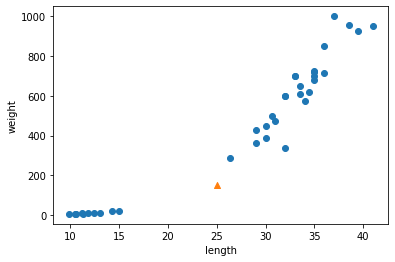

In [22]:
import matplotlib.pyplot as plt

plt.scatter(train_input[:, 0], train_input[:, 1])
plt.scatter(25, 150, marker='^')
plt.xlabel("length")
plt.ylabel("weight")

plt.show()

가까워 보이는 건, 오른쪽 위에 있는 그룹이야! (1)
근데 아까 predict([[25,150]]) 을 했을 때는, 0을 출력했어.

**Why?**

Scale 차이 때문! weight는 scale이 커서 그래프에서 조금만 차이나도 거리차이가 매우 크다고 계산될거야. 하지만 length(x축)는 많이 차이나도 weight에 비해 영향이 매우 적지.


**How?**

Scale을 맞춰주면서 가능할 수 있어!
Scale의 대표적인건 표준분포! 정규화가 있음.

In [24]:
distances, indexes = kn.kneighbors([[25, 150]])

In [25]:
print(distances, indexes)

[[130.48375378 130.73859415 137.17988191 138.32150953 140.00603558]] [[ 9  3 13  4 34]]


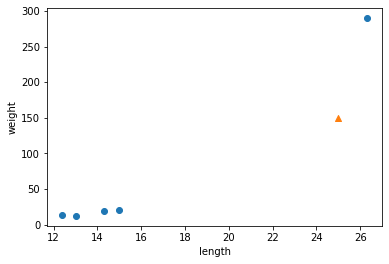

In [26]:
plt.scatter(train_input[indexes, 0], train_input[indexes, 1])
plt.scatter(25, 150, marker='^')
plt.xlabel("length")
plt.ylabel("weight")
plt.show()

In [28]:
mean = np.mean(train_input, axis=0)
std = np.std(train_input, axis=0)

print(mean, std)
train_scaled = (train_input - mean)/std
print(train_scaled)

[ 27.53888889 461.85555556] [ 10.08800932 323.92739365]
[[ 0.34309159  0.04057837]
 [-1.6890239  -1.40264629]
 [ 0.93785709  1.66131193]
 [-1.31233908 -1.36498352]
 [-1.44120494 -1.38813686]
 [ 1.33436743  1.50695636]
 [ 0.54134675  0.73517847]
 [ 0.83872951  1.1982452 ]
 [ 1.08654847  1.52239191]
 [-1.24294977 -1.3643661 ]
 [ 0.44221917  0.42646731]
 [ 0.73960192  0.73517847]
 [-1.61963459 -1.39554593]
 [-1.50068149 -1.38443233]
 [ 0.243964   -0.03659942]
 [ 0.54134675  0.73517847]
 [-1.56015804 -1.39523722]
 [ 0.83872951  0.77839803]
 [ 0.73960192  0.81235626]
 [ 1.18567606  1.42977857]
 [ 0.73960192  0.7969207 ]
 [ 0.73960192  0.67343624]
 [ 0.69003813  0.48820954]
 [ 0.44221917 -0.37618169]
 [ 0.59091055  0.45733843]
 [ 0.59091055  0.58082289]
 [ 0.14483642 -0.09834165]
 [-1.67911115 -1.40418984]
 [ 0.31335331  0.11775616]
 [-1.60972184 -1.39894175]
 [ 0.14483642 -0.30517813]
 [-1.75841321 -1.40511597]
 [ 0.44221917  0.42646731]
 [ 0.243964   -0.22182612]
 [-0.12280806 -0.53053727]

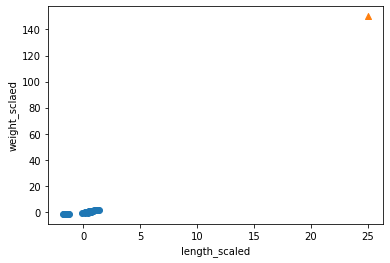

In [30]:
plt.scatter(train_scaled[:, 0], train_scaled[:, 1])
plt.scatter(25, 150, marker = "^")
plt.xlabel("length_scaled")
plt.ylabel("weight_sclaed")
plt.show()

In [32]:
new = ([25, 150] - mean)/std
print(new)

[-0.25167392 -0.96273289]


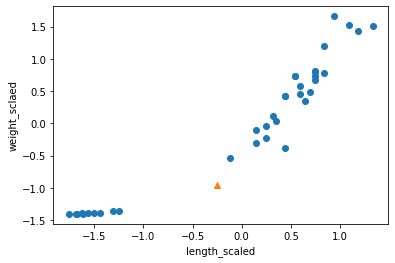

In [35]:
plt.scatter(train_scaled[:, 0], train_scaled[:, 1])
plt.scatter(new[0], new[1], marker = "^")
plt.xlabel("length_scaled")
plt.ylabel("weight_sclaed")
plt.show()

In [37]:
kn.fit(train_scaled, train_target)
test_scaled = (test_input - mean)/std

kn.score(test_scaled, test_target)

1.0

In [40]:
kn.predict([new])

array([1.])

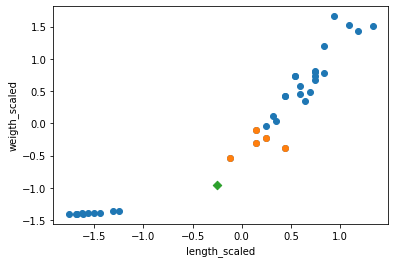

In [41]:
distances, indexes = kn.kneighbors([new])
plt.scatter(train_scaled[:, 0], train_scaled[:, 1])
plt.scatter(train_scaled[indexes, 0], train_scaled[indexes, 1])
plt.scatter(new[0], new[1], marker="D")

plt.xlabel("length_scaled")
plt.ylabel("weigth_scaled")
plt.show()